In [8]:
import pandas as pd
import numpy as np
import datetime
from scipy.stats import norm
import math

In [9]:
# Revise to change to download and clean the historical scores from aussportsbetting

In [10]:
# Read in Excel Scores
df_scores = pd.read_csv('2023_nrl.csv')

In [11]:
df_scores.tail()

,Date,Home Team,Away Team,Venue,Home Score,Away Score
199,2/09/2023,Redcliffe Dolphins,New Zealand Warriors,Suncorp Stadium,NaN,NaN
200,2/09/2023,Penrith Panthers,North QLD Cowboys,BlueBet Stadium,NaN,NaN
201,2/09/2023,St George Dragons,Newcastle Knights,Netstrata Jubilee Stadium,NaN,NaN
202,3/09/2023,Gold Coast Titans,Canterbury Bulldogs,Cbus Super Stadium,NaN,NaN
203,3/09/2023,Cronulla Sharks,Canberra Raiders,PointsBet Stadium,NaN,NaN


In [5]:
# Change the names to full names
df_scores = df_scores.replace('Dolphins','Redcliffe Dolphins')
df_scores = df_scores.replace('Sea-Eagles','Manly Sea Eagles')

In [6]:
# Lis the team names presented in the excel document
team_list = list(df_scores['Home Team'].unique())
print(team_list)
print(len(df_scores['Home Team'].unique()))

['Parramatta Eels', 'Penrith Panthers', 'New Zealand Warriors', 'Cronulla Sharks', 'North QLD Cowboys', 'Manly Sea Eagles', 'Wests Tigers', 'Redcliffe Dolphins', 'Brisbane Broncos', 'Melbourne Storm', 'Sydney Roosters', 'St George Dragons', 'Newcastle Knights', 'Gold Coast Titans', 'Canberra Raiders', 'Canterbury Bulldogs', 'South Sydney Rabbitohs']
17


In [7]:
# Change the partial team names if required
full_list = team_list[:17]
partial_list = team_list[17:]

In [8]:
for team in full_list:
    for name in partial_list:
        if name in team:
            df_scores = df_scores.replace(name,team)
            break

In [9]:
# Save the cleaned CSV file for analysis
df_scores.to_csv('nrl_scores_2023_clean.csv', index=False)

In [10]:
df_scores['Home Team'].unique()

array(['Parramatta Eels', 'Penrith Panthers', 'New Zealand Warriors',
       'Cronulla Sharks', 'North QLD Cowboys', 'Manly Sea Eagles',
       'Wests Tigers', 'Redcliffe Dolphins', 'Brisbane Broncos',
       'Melbourne Storm', 'Sydney Roosters', 'St George Dragons',
       'Newcastle Knights', 'Gold Coast Titans', 'Canberra Raiders',
       'Canterbury Bulldogs', 'South Sydney Rabbitohs'], dtype=object)

### Enter New Scores

In [12]:
df_scores = pd.read_csv('nrl_scores_2023_clean.csv')
df_scores.head()

,Date,Home Team,Away Team,Venue,Home Score,Away Score
0,2/03/2023,Parramatta Eels,Melbourne Storm,CommBank Stadium,12.0,16.0
1,3/03/2023,Penrith Panthers,Brisbane Broncos,BlueBet Stadium,12.0,13.0
2,3/03/2023,New Zealand Warriors,Newcastle Knights,Sky Stadium,20.0,12.0
3,4/03/2023,Cronulla Sharks,South Sydney Rabbitohs,Pointsbet Stadium,18.0,27.0
4,4/03/2023,North QLD Cowboys,Canberra Raiders,QCB Stadium,19.0,18.0


In [13]:
df_scores.loc[(df_scores['Home Team'] == 'Parramatta Eels') & (df_scores['Away Team'] == 'Melbourne Storm')]['Home Score']

0    12.0
Name: Home Score, dtype: float64

In [14]:
df_scores.loc[(df_scores['Home Team'] == 'Parramatta Eels') & (df_scores['Away Team'] == 'Melbourne Storm')]['Home Score']

0    12.0
Name: Home Score, dtype: float64

In [15]:
df_scores['Date'] = pd.to_datetime(df_scores['Date'], format='%d/%m/%Y')

In [16]:
for index, row in df_scores.iterrows():
    if np.isnan(row['Home Score']) and row['Date'] < datetime.datetime.now():
        home_team = row['Home Team']
        away_team = row['Away Team']
        match_date = row['Date']
        print(f'{match_date.date()}: {home_team} vs {away_team}')
        home_score = input(f'{home_team} Score :')
        away_score = input(f'{away_team} Score :')
        print(f'{home_team} {home_score} vs {away_team} {away_score}')
        correct_bool = input('Correct?')
        
        if correct_bool == 'y':
            df_scores.at[index,'Home Score'] = home_score
            df_scores.at[index,'Away Score'] = away_score
            

2023-08-05: North QLD Cowboys vs Brisbane Broncos
North QLD Cowboys Score :14
Brisbane Broncos Score :30
North QLD Cowboys 14 vs Brisbane Broncos 30
Correct?y
2023-08-05: Redcliffe Dolphins vs Newcastle Knights
Redcliffe Dolphins Score :28
Newcastle Knights Score :30
Redcliffe Dolphins 28 vs Newcastle Knights 30
Correct?y
2023-08-05: South Sydney Rabbitohs vs Cronulla Sharks
South Sydney Rabbitohs Score :16
Cronulla Sharks Score :26
South Sydney Rabbitohs 16 vs Cronulla Sharks 26
Correct?y


In [17]:
df_scores.to_csv('nrl_scores_2023_clean.csv', index=False)

### Team Statistics

In [18]:
# Create the Summary scoring statistics for model use
# Home Off/Def Avg, Away Off/Def Avg, Home/Away Count, Offence and Defence Averages, Total For and Against

In [18]:
df_scores = pd.read_csv('nrl_scores_2023_clean.csv')

# Remove the Games not played
df_scores = df_scores[df_scores['Home Score'] >= 0]

In [19]:
df_scores['Home Win'] = 1
df_scores.loc[df_scores['Away Score'] > df_scores['Home Score'], 'Home Win'] = 0
df_scores.loc[df_scores['Away Score'] == df_scores['Home Score'], 'Home Win'] = 0.5
df_scores['Away Win'] = 1 - df_scores['Home Win']

df_scores.head()


,Date,Home Team,Away Team,Venue,Home Score,Away Score,Home Win,Away Win
0,2023-03-02,Parramatta Eels,Melbourne Storm,CommBank Stadium,12.0,16.0,0.0,1.0
1,2023-03-03,Penrith Panthers,Brisbane Broncos,BlueBet Stadium,12.0,13.0,0.0,1.0
2,2023-03-03,New Zealand Warriors,Newcastle Knights,Sky Stadium,20.0,12.0,1.0,0.0
3,2023-03-04,Cronulla Sharks,South Sydney Rabbitohs,Pointsbet Stadium,18.0,27.0,0.0,1.0
4,2023-03-04,North QLD Cowboys,Canberra Raiders,QCB Stadium,19.0,18.0,1.0,0.0


In [20]:
# Offence Average by Home and Away
home_averages = df_scores.groupby(['Home Team'])['Home Score'].mean()
away_averages = df_scores.groupby(['Away Team'])['Away Score'].mean()

# Defence Averages by Home and Away
home_averages_ag = df_scores.groupby(['Home Team'])['Away Score'].mean()
away_averages_ag = df_scores.groupby(['Away Team'])['Home Score'].mean()

# Home and Away Count
home_count = df_scores.groupby(['Home Team'])['Home Team'].count()
away_count = df_scores.groupby(['Away Team'])['Away Team'].count()

wins = df_scores.groupby(['Home Team'])['Home Win'].sum() + df_scores.groupby(['Away Team'])['Away Win'].sum()

In [21]:
# Combine Statistics
team_table = pd.concat([home_averages, home_averages_ag, home_count, 
                        away_averages, away_averages_ag, away_count, wins], axis=1)
team_table.columns = ['home_score','home_score_ag','home_count',
                      'away_score','away_score_ag','away_count', 'wins']

In [22]:
team_table['points_for'] = team_table.apply(lambda row : row['home_score'] * row['home_count'] + 
                                          row['away_score'] * row['away_count'], axis=1)

team_table['points_against'] = team_table.apply(lambda row : row['home_score_ag'] * row['home_count'] + 
                                          row['away_score_ag'] * row['away_count'], axis=1)

In [23]:
team_table['average_for'] = team_table.apply(lambda row: row['points_for'] / (row['home_count']+row['away_count']), axis=1)
team_table['average_against'] = team_table.apply(lambda row: row['points_against'] / (row['home_count']+row['away_count']),axis=1)

In [24]:
team_table.to_csv('nrl_scoring_statistics.csv')
team_table.head()

,home_score,home_score_ag,home_count,away_score,away_score_ag,away_count,wins,points_for,points_against,average_for,average_against
Brisbane Broncos,23.000000,17.700000,10,27.636364,17.090909,11,16.0,534.0,365.0,25.428571,17.380952
Canberra Raiders,19.222222,29.222222,9,22.900000,21.700000,10,11.0,402.0,480.0,21.157895,25.263158
Canterbury Bulldogs,18.000000,32.818182,11,17.333333,28.222222,9,7.0,354.0,615.0,17.700000,30.750000
Cronulla Sharks,29.400000,19.500000,10,22.700000,24.600000,10,11.0,521.0,441.0,26.050000,22.050000
Gold Coast Titans,24.500000,27.700000,10,21.200000,23.300000,10,8.0,457.0,510.0,22.850000,25.500000


### DVOA Model

In [25]:
# Read in Summary scoring statistics
team_table = pd.read_csv('nrl_scoring_statistics.csv', index_col=0)

In [26]:
# Create a dictionary of the teams and their average Offence and Defence 
pts_for_avg = dict(zip(team_table.index,team_table['average_for']))
pts_ag_avg = dict(zip(team_table.index,team_table['average_against']))
pts_for_avg

{'Brisbane Broncos': 25.428571428571427,
 'Canberra Raiders': 21.157894736842103,
 'Canterbury Bulldogs': 17.7,
 'Cronulla Sharks': 26.05,
 'Gold Coast Titans': 22.85,
 'Manly Sea Eagles': 20.75,
 'Melbourne Storm': 23.6,
 'New Zealand Warriors': 24.25,
 'Newcastle Knights': 24.55,
 'North QLD Cowboys': 23.23809523809524,
 'Parramatta Eels': 25.35,
 'Penrith Panthers': 25.95,
 'Redcliffe Dolphins': 21.95,
 'South Sydney Rabbitohs': 24.571428571428573,
 'St George Dragons': 20.73684210526316,
 'Sydney Roosters': 17.5,
 'Wests Tigers': 15.842105263157896}

In [27]:
# Read in the Games and Scores
df_dvoa = pd.read_csv('nrl_scores_2023_clean.csv')
df_dvoa = df_scores[df_scores['Home Score'] >= 0]

In [28]:
# Map the Team averages to the game records
df_dvoa['home_avg_for'] = df_dvoa['Home Team'].map(pts_for_avg)
df_dvoa['away_avg_for'] = df_dvoa['Away Team'].map(pts_for_avg)
df_dvoa['home_avg_ag'] = df_dvoa['Home Team'].map(pts_ag_avg)
df_dvoa['away_avg_ag'] = df_dvoa['Away Team'].map(pts_ag_avg)

In [29]:
# Calculate the difference the score is to the average performance of the opponent
df_dvoa['home_dif_for'] = df_dvoa.apply(lambda row: row['Home Score'] - row['away_avg_ag'], axis=1)
df_dvoa['home_dif_against'] = df_dvoa.apply(lambda row: row['Away Score'] - row['away_avg_for'], axis=1)
df_dvoa['away_dif_for'] = df_dvoa.apply(lambda row: row['Away Score'] - row['home_avg_ag'], axis=1)
df_dvoa['away_dif_against'] = df_dvoa.apply(lambda row: row['Home Score'] - row['home_avg_for'], axis=1)

In [30]:
# Adjust the differences to three standard deviations to avoid blowout weightings

for column in df_dvoa[['home_dif_for','home_dif_against','away_dif_for','away_dif_against']]:
    threshold = df_dvoa[column].std() * 3
    df_dvoa[column] = df_dvoa[column].apply(lambda x: x if x < threshold else threshold )
    df_dvoa[column] = df_dvoa[column].apply(lambda x: x if x > -threshold else -threshold )

In [31]:
# Sum the differences for each team
off_dif = df_dvoa.groupby(['Home Team'])['home_dif_for'].sum() + df_dvoa.groupby(['Away Team'])['away_dif_for'].sum()
def_dif = df_dvoa.groupby(['Home Team'])['home_dif_against'].sum() +\
            df_dvoa.groupby(['Away Team'])['away_dif_against'].sum()

In [32]:
off_dif_dict = dict(off_dif.round(2))
def_dif_dict = dict(def_dif.round(2))


In [33]:
# Average the Offence and Defence difference per team, append to scoring statistic df
team_table['dvoa_off'] = team_table.index.map(off_dif_dict) / (team_table['home_count'] + team_table['away_count'])
team_table['dvoa_def'] = team_table.index.map(def_dif_dict) / (team_table['home_count'] + team_table['away_count'])
team_table = team_table.round(2)

In [34]:
# Dictionary with Teams DVOA scores
pts_for_dvoa = dict(zip(team_table.index,team_table['dvoa_off']))
pts_ag_dvoa = dict(zip(team_table.index,team_table['dvoa_def']))

In [35]:
# Append DVOA scores to the game records
df_dvoa['home_off_dvoa'] = df_dvoa['Home Team'].map(pts_for_dvoa)
df_dvoa['home_def_dvoa'] = df_dvoa['Home Team'].map(pts_ag_dvoa)
df_dvoa['away_off_dvoa'] = df_dvoa['Away Team'].map(pts_for_dvoa)
df_dvoa['away_def_dvoa'] = df_dvoa['Away Team'].map(pts_ag_dvoa)

In [36]:
df_dvoa.tail()

,Date,Home Team,Away Team,Venue,Home Score,Away Score,Home Win,Away Win,home_avg_for,away_avg_for,home_avg_ag,away_avg_ag,home_dif_for,home_dif_against,away_dif_for,away_dif_against,home_off_dvoa,home_def_dvoa,away_off_dvoa,away_def_dvoa
165,2023-08-04,Gold Coast Titans,New Zealand Warriors,Cbus Super Stadium,18.0,28.0,0.0,1.0,22.850000,24.250000,25.500000,18.200000,-0.200000,3.750000,2.500000,-4.850000,-0.49,3.54,1.32,-4.34
166,2023-08-04,Penrith Panthers,Melbourne Storm,BlueBet Stadium,26.0,6.0,1.0,0.0,25.950000,23.600000,12.100000,19.550000,6.450000,-17.600000,-6.100000,0.050000,3.61,-10.32,1.71,-2.75
167,2023-08-05,North QLD Cowboys,Brisbane Broncos,Queensland Country Bank Stadium,14.0,30.0,0.0,1.0,23.238095,25.428571,21.714286,17.380952,-3.380952,4.571429,8.285714,-9.238095,0.16,-1.44,2.92,-5.22
168,2023-08-05,Redcliffe Dolphins,Newcastle Knights,"Optus Stadium, Perth",28.0,30.0,0.0,1.0,21.950000,24.550000,26.650000,20.850000,7.150000,5.450000,3.350000,6.050000,-0.38,3.66,2.00,-1.23
169,2023-08-05,South Sydney Rabbitohs,Cronulla Sharks,"Optus Stadium, Perth",16.0,26.0,0.0,1.0,24.571429,26.050000,20.761905,22.050000,-6.050000,-0.050000,5.238095,-8.571429,2.16,-1.47,3.25,0.02


In [37]:
# Home and Away team projections for each team, append to Game records
df_dvoa['home_projection'] = df_dvoa.apply(lambda row : (row['home_avg_for'] + row['away_def_dvoa'] +
                                           row['away_avg_ag'] + row['home_off_dvoa'])/2, axis=1)
df_dvoa['away_projection'] = df_dvoa.apply(lambda row : (row['away_avg_for'] + row['home_def_dvoa'] +
                                           row['home_avg_ag'] + row['away_off_dvoa'])/2, axis=1)
df_dvoa

,Date,Home Team,Away Team,Venue,Home Score,Away Score,Home Win,Away Win,home_avg_for,away_avg_for,...,home_dif_for,home_dif_against,away_dif_for,away_dif_against,home_off_dvoa,home_def_dvoa,away_off_dvoa,away_def_dvoa,home_projection,away_projection
0,2023-03-02,Parramatta Eels,Melbourne Storm,CommBank Stadium,12.0,16.0,0.0,1.0,25.350000,23.600000,...,-7.550000,-7.600000,-6.400000,-13.350000,2.71,0.22,1.71,-2.75,22.430000,23.965000
1,2023-03-03,Penrith Panthers,Brisbane Broncos,BlueBet Stadium,12.0,13.0,0.0,1.0,25.950000,25.428571,...,-5.380952,-12.428571,0.900000,-13.950000,3.61,-10.32,2.92,-5.22,20.860476,15.064286
2,2023-03-03,New Zealand Warriors,Newcastle Knights,Sky Stadium,20.0,12.0,1.0,0.0,24.250000,24.550000,...,-0.850000,-12.550000,-6.200000,-4.250000,1.32,-4.34,2.00,-1.23,22.595000,20.205000
3,2023-03-04,Cronulla Sharks,South Sydney Rabbitohs,Pointsbet Stadium,18.0,27.0,0.0,1.0,26.050000,24.571429,...,-2.761905,2.428571,4.950000,-8.050000,3.25,0.02,2.16,-1.47,24.295952,24.400714
4,2023-03-04,North QLD Cowboys,Canberra Raiders,QCB Stadium,19.0,18.0,1.0,0.0,23.238095,21.157895,...,-6.263158,-3.157895,-3.714286,-4.238095,0.16,-1.44,-1.59,2.73,25.695627,19.921090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2023-08-04,Gold Coast Titans,New Zealand Warriors,Cbus Super Stadium,18.0,28.0,0.0,1.0,22.850000,24.250000,...,-0.200000,3.750000,2.500000,-4.850000,-0.49,3.54,1.32,-4.34,18.110000,27.305000
166,2023-08-04,Penrith Panthers,Melbourne Storm,BlueBet Stadium,26.0,6.0,1.0,0.0,25.950000,23.600000,...,6.450000,-17.600000,-6.100000,0.050000,3.61,-10.32,1.71,-2.75,23.180000,13.545000
167,2023-08-05,North QLD Cowboys,Brisbane Broncos,Queensland Country Bank Stadium,14.0,30.0,0.0,1.0,23.238095,25.428571,...,-3.380952,4.571429,8.285714,-9.238095,0.16,-1.44,2.92,-5.22,17.779524,24.311429
168,2023-08-05,Redcliffe Dolphins,Newcastle Knights,"Optus Stadium, Perth",28.0,30.0,0.0,1.0,21.950000,24.550000,...,7.150000,5.450000,3.350000,6.050000,-0.38,3.66,2.00,-1.23,20.595000,28.430000


In [38]:
# Difference between Projected and Actual Score
df_dvoa['proj_dif'] = df_dvoa['Home Score'] - df_dvoa['home_projection'] + df_dvoa['Away Score'] - df_dvoa['away_projection']

In [39]:
df_dvoa.tail()

,Date,Home Team,Away Team,Venue,Home Score,Away Score,Home Win,Away Win,home_avg_for,away_avg_for,...,home_dif_against,away_dif_for,away_dif_against,home_off_dvoa,home_def_dvoa,away_off_dvoa,away_def_dvoa,home_projection,away_projection,proj_dif
165,2023-08-04,Gold Coast Titans,New Zealand Warriors,Cbus Super Stadium,18.0,28.0,0.0,1.0,22.850000,24.250000,...,3.750000,2.500000,-4.850000,-0.49,3.54,1.32,-4.34,18.110000,27.305000,0.585000
166,2023-08-04,Penrith Panthers,Melbourne Storm,BlueBet Stadium,26.0,6.0,1.0,0.0,25.950000,23.600000,...,-17.600000,-6.100000,0.050000,3.61,-10.32,1.71,-2.75,23.180000,13.545000,-4.725000
167,2023-08-05,North QLD Cowboys,Brisbane Broncos,Queensland Country Bank Stadium,14.0,30.0,0.0,1.0,23.238095,25.428571,...,4.571429,8.285714,-9.238095,0.16,-1.44,2.92,-5.22,17.779524,24.311429,1.909048
168,2023-08-05,Redcliffe Dolphins,Newcastle Knights,"Optus Stadium, Perth",28.0,30.0,0.0,1.0,21.950000,24.550000,...,5.450000,3.350000,6.050000,-0.38,3.66,2.00,-1.23,20.595000,28.430000,8.975000
169,2023-08-05,South Sydney Rabbitohs,Cronulla Sharks,"Optus Stadium, Perth",16.0,26.0,0.0,1.0,24.571429,26.050000,...,-0.050000,5.238095,-8.571429,2.16,-1.47,3.25,0.02,24.400714,24.295952,-6.696667


In [40]:
# MSE for Projections
np.sqrt((df_dvoa['proj_dif'].pow(2).sum())/(df_dvoa.shape[0]))

12.616361600796003

In [41]:
df_dvoa['proj_dif']

0     -18.395000
1     -10.924762
2     -10.800000
3      -3.696667
4      -8.616717
         ...    
165     0.585000
166    -4.725000
167     1.909048
168     8.975000
169    -6.696667
Name: proj_dif, Length: 170, dtype: float64

In [42]:
df_dvoa['proj_dif'].loc[(df_dvoa['proj_dif'] < 6) & (df_dvoa['proj_dif'] > -6)].count() / df_dvoa.shape[0]

0.3235294117647059

In [43]:
df_dvoa['proj_dif'].loc[(df_dvoa['proj_dif'] < 12) & (df_dvoa['proj_dif'] > -12)].count() / df_dvoa.shape[0]

0.6235294117647059

In [44]:
df_dvoa.to_csv('nrl_2023_dvoa.csv')

In [45]:
team_table.to_csv('nrl_2023_team_summary.csv')

In [46]:
team_table

,home_score,home_score_ag,home_count,away_score,away_score_ag,away_count,wins,points_for,points_against,average_for,average_against,dvoa_off,dvoa_def
Brisbane Broncos,23.00,17.70,10,27.64,17.09,11,16.0,534.0,365.0,25.43,17.38,2.92,-5.22
Canberra Raiders,19.22,29.22,9,22.90,21.70,10,11.0,402.0,480.0,21.16,25.26,-1.59,2.73
Canterbury Bulldogs,18.00,32.82,11,17.33,28.22,9,7.0,354.0,615.0,17.70,30.75,-4.10,7.02
Cronulla Sharks,29.40,19.50,10,22.70,24.60,10,11.0,521.0,441.0,26.05,22.05,3.25,0.02
Gold Coast Titans,24.50,27.70,10,21.20,23.30,10,8.0,457.0,510.0,22.85,25.50,-0.49,3.54
Manly Sea Eagles,22.90,20.70,10,18.60,24.30,10,9.5,415.0,450.0,20.75,22.50,-1.75,-0.18
Melbourne Storm,27.00,17.80,10,20.20,21.30,10,12.0,472.0,391.0,23.60,19.55,1.71,-2.75
New Zealand Warriors,18.70,16.60,10,29.80,19.80,10,13.0,485.0,364.0,24.25,18.20,1.32,-4.34
Newcastle Knights,27.00,20.89,9,22.55,20.82,11,10.5,491.0,417.0,24.55,20.85,2.00,-1.23
North QLD Cowboys,29.18,19.55,11,16.70,24.10,10,11.0,488.0,456.0,23.24,21.71,0.16,-1.44


### DVOHAA Model


In [47]:
# Read in Summary scoring statistics
team_table = pd.read_csv('nrl_2023_team_summary.csv', index_col=0)
team_table.head()

,home_score,home_score_ag,home_count,away_score,away_score_ag,away_count,wins,points_for,points_against,average_for,average_against,dvoa_off,dvoa_def
Brisbane Broncos,23.00,17.70,10,27.64,17.09,11,16.0,534.0,365.0,25.43,17.38,2.92,-5.22
Canberra Raiders,19.22,29.22,9,22.90,21.70,10,11.0,402.0,480.0,21.16,25.26,-1.59,2.73
Canterbury Bulldogs,18.00,32.82,11,17.33,28.22,9,7.0,354.0,615.0,17.70,30.75,-4.10,7.02
Cronulla Sharks,29.40,19.50,10,22.70,24.60,10,11.0,521.0,441.0,26.05,22.05,3.25,0.02
Gold Coast Titans,24.50,27.70,10,21.20,23.30,10,8.0,457.0,510.0,22.85,25.50,-0.49,3.54


In [48]:
# Read in the NRL games played
df_dvoha = pd.read_csv('nrl_scores_2023_clean.csv')
df_dvoha = df_dvoha[df_dvoha['Home Score'] >= 0]
df_dvoha.tail()

,Date,Home Team,Away Team,Venue,Home Score,Away Score
165,2023-08-04,Gold Coast Titans,New Zealand Warriors,Cbus Super Stadium,18.0,28.0
166,2023-08-04,Penrith Panthers,Melbourne Storm,BlueBet Stadium,26.0,6.0
167,2023-08-05,North QLD Cowboys,Brisbane Broncos,Queensland Country Bank Stadium,14.0,30.0
168,2023-08-05,Redcliffe Dolphins,Newcastle Knights,"Optus Stadium, Perth",28.0,30.0
169,2023-08-05,South Sydney Rabbitohs,Cronulla Sharks,"Optus Stadium, Perth",16.0,26.0


In [49]:
# Create a dictionary of the teams and their average Offence and Defence 
pts_home_for_avg = dict(zip(team_table.index,team_table['home_score']))
pts_home_ag_avg = dict(zip(team_table.index,team_table['home_score_ag']))
pts_away_for_avg = dict(zip(team_table.index,team_table['away_score']))
pts_away_ag_avg = dict(zip(team_table.index,team_table['away_score_ag']))
pts_away_for_avg

{'Brisbane Broncos': 27.64,
 'Canberra Raiders': 22.9,
 'Canterbury Bulldogs': 17.33,
 'Cronulla Sharks': 22.7,
 'Gold Coast Titans': 21.2,
 'Manly Sea Eagles': 18.6,
 'Melbourne Storm': 20.2,
 'New Zealand Warriors': 29.8,
 'Newcastle Knights': 22.55,
 'North QLD Cowboys': 16.7,
 'Parramatta Eels': 27.0,
 'Penrith Panthers': 24.7,
 'Redcliffe Dolphins': 23.3,
 'South Sydney Rabbitohs': 30.64,
 'St George Dragons': 17.78,
 'Sydney Roosters': 15.8,
 'Wests Tigers': 11.33}

In [50]:
# Map the Team averages to the game records
df_dvoha['home_avg_for'] = df_dvoa['Home Team'].map(pts_home_for_avg)
df_dvoha['away_avg_for'] = df_dvoa['Away Team'].map(pts_away_for_avg)
df_dvoha['home_avg_ag'] = df_dvoa['Home Team'].map(pts_home_ag_avg)
df_dvoha['away_avg_ag'] = df_dvoa['Away Team'].map(pts_away_ag_avg)
df_dvoha.head()

,Date,Home Team,Away Team,Venue,Home Score,Away Score,home_avg_for,away_avg_for,home_avg_ag,away_avg_ag
0,2023-03-02,Parramatta Eels,Melbourne Storm,CommBank Stadium,12.0,16.0,23.70,20.20,19.40,21.30
1,2023-03-03,Penrith Panthers,Brisbane Broncos,BlueBet Stadium,12.0,13.0,27.20,27.64,10.50,17.09
2,2023-03-03,New Zealand Warriors,Newcastle Knights,Sky Stadium,20.0,12.0,18.70,22.55,16.60,20.82
3,2023-03-04,Cronulla Sharks,South Sydney Rabbitohs,Pointsbet Stadium,18.0,27.0,29.40,30.64,19.50,17.27
4,2023-03-04,North QLD Cowboys,Canberra Raiders,QCB Stadium,19.0,18.0,29.18,22.90,19.55,21.70


In [51]:
# Calculate the difference the score is to the average performance of the opponent
df_dvoha['home_dif_for'] = df_dvoha.apply(lambda row: row['Home Score'] - row['away_avg_ag'], axis=1)
df_dvoha['home_dif_against'] = df_dvoha.apply(lambda row: row['Away Score'] - row['away_avg_for'], axis=1)
df_dvoha['away_dif_for'] = df_dvoha.apply(lambda row: row['Away Score'] - row['home_avg_ag'], axis=1)
df_dvoha['away_dif_against'] = df_dvoha.apply(lambda row: row['Home Score'] - row['home_avg_for'], axis=1)
df_dvoha

,Date,Home Team,Away Team,Venue,Home Score,Away Score,home_avg_for,away_avg_for,home_avg_ag,away_avg_ag,home_dif_for,home_dif_against,away_dif_for,away_dif_against
0,2023-03-02,Parramatta Eels,Melbourne Storm,CommBank Stadium,12.0,16.0,23.70,20.20,19.40,21.30,-9.30,-4.20,-3.40,-11.70
1,2023-03-03,Penrith Panthers,Brisbane Broncos,BlueBet Stadium,12.0,13.0,27.20,27.64,10.50,17.09,-5.09,-14.64,2.50,-15.20
2,2023-03-03,New Zealand Warriors,Newcastle Knights,Sky Stadium,20.0,12.0,18.70,22.55,16.60,20.82,-0.82,-10.55,-4.60,1.30
3,2023-03-04,Cronulla Sharks,South Sydney Rabbitohs,Pointsbet Stadium,18.0,27.0,29.40,30.64,19.50,17.27,0.73,-3.64,7.50,-11.40
4,2023-03-04,North QLD Cowboys,Canberra Raiders,QCB Stadium,19.0,18.0,29.18,22.90,19.55,21.70,-2.70,-4.90,-1.55,-10.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2023-08-04,Gold Coast Titans,New Zealand Warriors,Cbus Super Stadium,18.0,28.0,24.50,29.80,27.70,19.80,-1.80,-1.80,0.30,-6.50
166,2023-08-04,Penrith Panthers,Melbourne Storm,BlueBet Stadium,26.0,6.0,27.20,20.20,10.50,21.30,4.70,-14.20,-4.50,-1.20
167,2023-08-05,North QLD Cowboys,Brisbane Broncos,Queensland Country Bank Stadium,14.0,30.0,29.18,27.64,19.55,17.09,-3.09,2.36,10.45,-15.18
168,2023-08-05,Redcliffe Dolphins,Newcastle Knights,"Optus Stadium, Perth",28.0,30.0,20.60,22.55,25.00,20.82,7.18,7.45,5.00,7.40


In [52]:
# Adjust the differences to three standard deviations to avoid blowout weightings

for column in df_dvoha[['home_dif_for','home_dif_against','away_dif_for','away_dif_against']]:
    threshold = df_dvoha[column].std() * 3
    df_dvoha[column] = df_dvoha[column].apply(lambda x: x if x < threshold else threshold)
    df_dvoha[column] = df_dvoha[column].apply(lambda x: x if x > -threshold else -threshold)

In [53]:
team_table['dvoa_home_off'] = df_dvoha.groupby(['Home Team'])['home_dif_for'].mean()
team_table['dvoa_home_def'] = df_dvoha.groupby(['Home Team'])['home_dif_against'].mean()
team_table['dvoa_away_off'] = df_dvoha.groupby(['Away Team'])['away_dif_for'].mean()
team_table['dvoa_away_def'] = df_dvoha.groupby(['Away Team'])['away_dif_against'].mean()

In [54]:
team_table.head()

,home_score,home_score_ag,home_count,away_score,away_score_ag,away_count,wins,points_for,points_against,average_for,average_against,dvoa_off,dvoa_def,dvoa_home_off,dvoa_home_def,dvoa_away_off,dvoa_away_def
Brisbane Broncos,23.00,17.70,10,27.64,17.09,11,16.0,534.0,365.0,25.43,17.38,2.92,-5.22,-0.359000,-2.990000,6.348182,-6.461818
Canberra Raiders,19.22,29.22,9,22.90,21.70,10,11.0,402.0,480.0,21.16,25.26,-1.59,2.73,-4.147778,6.152222,0.044000,0.012000
Canterbury Bulldogs,18.00,32.82,11,17.33,28.22,9,7.0,354.0,615.0,17.70,30.75,-4.10,7.02,-5.024545,8.272381,-2.322222,4.955556
Cronulla Sharks,29.40,19.50,10,22.70,24.60,10,11.0,521.0,441.0,26.05,22.05,3.25,0.02,6.059000,-2.514000,0.556000,2.808000
Gold Coast Titans,24.50,27.70,10,21.20,23.30,10,8.0,457.0,510.0,22.85,25.50,-0.49,3.54,0.734000,5.681000,-2.308000,0.610000


In [55]:
# Dictionary with Teams DVOA scores
pts_home_for_dvoa = dict(zip(team_table.index,team_table['dvoa_home_off']))
pts_home_ag_dvoa = dict(zip(team_table.index,team_table['dvoa_home_def']))
pts_away_for_dvoa = dict(zip(team_table.index,team_table['dvoa_away_off']))
pts_away_ag_dvoa = dict(zip(team_table.index,team_table['dvoa_away_def']))
pts_away_ag_dvoa

{'Brisbane Broncos': -6.461818181818182,
 'Canberra Raiders': 0.012000000000000455,
 'Canterbury Bulldogs': 4.955555555555557,
 'Cronulla Sharks': 2.8080000000000007,
 'Gold Coast Titans': 0.6100000000000005,
 'Manly Sea Eagles': 0.9080000000000009,
 'Melbourne Storm': -1.9079999999999995,
 'New Zealand Warriors': -4.26,
 'Newcastle Knights': -2.0727272727272723,
 'North QLD Cowboys': 1.2120212851654775,
 'Parramatta Eels': 3.560000000000001,
 'Penrith Panthers': -8.85,
 'Redcliffe Dolphins': 4.702021285165477,
 'South Sydney Rabbitohs': -5.536363636363635,
 'St George Dragons': 6.533333333333334,
 'Sydney Roosters': -0.9699999999999995,
 'Wests Tigers': 5.602245872406086}

In [56]:
df_dvoha['home_dvoha_off'] = df_dvoha['Home Team'].map(pts_home_for_dvoa)
df_dvoha['home_dvoha_def'] = df_dvoha['Home Team'].map(pts_home_ag_dvoa)
df_dvoha['away_dvoha_off'] = df_dvoha['Away Team'].map(pts_away_for_dvoa)
df_dvoha['away_dvoha_def'] = df_dvoha['Away Team'].map(pts_away_ag_dvoa)

In [57]:
df_dvoha['home_projection'] = round(((df_dvoha['home_avg_for'] + df_dvoha['away_dvoha_def'])+\
                               (df_dvoha['away_avg_ag'] + df_dvoha['home_dvoha_off']))/2,2)

df_dvoha['away_projection'] = round(((df_dvoha['home_avg_ag'] + df_dvoha['away_dvoha_off'])+\
                               (df_dvoha['away_avg_for'] + df_dvoha['home_dvoha_def']))/2,2)

In [58]:
df_dvoha['Error'] = df_dvoha['Home Score'] - df_dvoha['home_projection'] +\
                    df_dvoha['Away Score'] - df_dvoha['away_projection']

In [59]:
np.sqrt((df_dvoha['Error'].pow(2).sum())/(df_dvoha.shape[0]))

12.057915437830967

<AxesSubplot:ylabel='Frequency'>

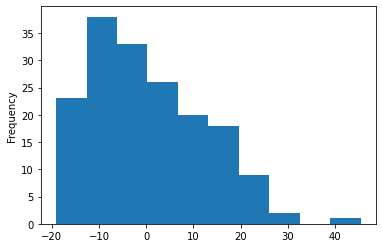

In [60]:
df_dvoha['Error'].plot(kind='hist')

In [61]:
df_dvoha['Error'].loc[(df_dvoha['Error'] < 6) & (df_dvoha['Error'] > -6)].count() / df_dvoha.shape[0]

0.3235294117647059

In [62]:
df_dvoha['Error'].loc[(df_dvoha['Error'] <= 12) & (df_dvoha['Error'] >= -12)].count() / df_dvoha.shape[0]

0.6235294117647059

In [63]:
df_dvoha.to_csv('nrl_2023_dvoha.csv')

In [64]:
team_table.to_csv('nrl_2023_team_summary.csv')

### Elo Model

In [65]:
# Read in the NRL games played
df_elo = pd.read_csv('nrl_scores_2023_clean.csv')
df_elo = df_elo[df_elo['Home Score'] >= 0]
df_elo.tail()

,Date,Home Team,Away Team,Venue,Home Score,Away Score
165,2023-08-04,Gold Coast Titans,New Zealand Warriors,Cbus Super Stadium,18.0,28.0
166,2023-08-04,Penrith Panthers,Melbourne Storm,BlueBet Stadium,26.0,6.0
167,2023-08-05,North QLD Cowboys,Brisbane Broncos,Queensland Country Bank Stadium,14.0,30.0
168,2023-08-05,Redcliffe Dolphins,Newcastle Knights,"Optus Stadium, Perth",28.0,30.0
169,2023-08-05,South Sydney Rabbitohs,Cronulla Sharks,"Optus Stadium, Perth",16.0,26.0


In [66]:
team_table = pd.read_csv('nrl_2023_team_summary.csv', index_col=0)

In [67]:
elo_2022 = [1485,1539,1426,1550,1424,1447,1541,1414,1409,1556,1571,1623,1500,1565,1495,1559,1396]
team_table['elo_2022'] = elo_2022
team_table['elo_2022'].sum()

25500

In [68]:
elo_dict = dict(zip(team_table.index,team_table['elo_2022']))
elo_dict

{'Brisbane Broncos': 1485,
 'Canberra Raiders': 1539,
 'Canterbury Bulldogs': 1426,
 'Cronulla Sharks': 1550,
 'Gold Coast Titans': 1424,
 'Manly Sea Eagles': 1447,
 'Melbourne Storm': 1541,
 'New Zealand Warriors': 1414,
 'Newcastle Knights': 1409,
 'North QLD Cowboys': 1556,
 'Parramatta Eels': 1571,
 'Penrith Panthers': 1623,
 'Redcliffe Dolphins': 1500,
 'South Sydney Rabbitohs': 1565,
 'St George Dragons': 1495,
 'Sydney Roosters': 1559,
 'Wests Tigers': 1396}

In [69]:
# Margin of Victory multiplier: log(1 + winning team's margin of victory)*2.2/((winner Elo - loser Elo)*0.001 + 2.2)
for i in range(len(df_elo)):
    df_elo.loc[i,'home_elo'] = elo_dict[df_elo.loc[i,'Home Team']]
    df_elo.loc[i,'away_elo'] = elo_dict[df_elo.loc[i,'Away Team']]
    
    df_elo.loc[i,'proj_margin'] = ((df_elo.loc[i,'home_elo']+37.5) - df_elo.loc[i,'away_elo'])/15
    
    df_elo.loc[i,'home_chance'] = 1/(np.power(10,(-(df_elo.loc[i,'home_elo']-df_elo.loc[i,'away_elo']+37.5)/300))+1)
    
    df_elo.loc[i,'away_chance'] = 1 - df_elo.loc[i,'home_chance']
    
    margin = df_elo.loc[i,'Home Score'] - df_elo.loc[i,'Away Score']
    
    #Rnew = ROld + K * MOV * (W-Wexpectation)
    if margin > 0:
        change_elo =  (1 - df_elo.loc[i,'home_chance']) * 30 *  \
        math.log10(1 + margin) * 2.2/((df_elo.loc[i,'home_elo']-df_elo.loc[i,'away_elo']+37.5)*0.001 +2.2)   
    
    elif margin < 0:
        change_elo =  -(1 - df_elo.loc[i,'away_chance']) * 30 * \
        math.log10(1 + -margin) * 2.2/((df_elo.loc[i,'away_elo']-df_elo.loc[i,'home_elo']-37.5)*0.001 +2.2)   
    
    elif margin == 0:
        change_elo =  (0.5 - df_elo.loc[i,'home_chance']) * 30
    else:
        change_elo = 0
    elo_dict[df_elo.loc[i,'Home Team']] += change_elo 
    elo_dict[df_elo.loc[i,'Away Team']] -= change_elo
    

In [70]:
df_elo

,Date,Home Team,Away Team,Venue,Home Score,Away Score,home_elo,away_elo,proj_margin,home_chance,away_chance
0,2023-03-02,Parramatta Eels,Melbourne Storm,CommBank Stadium,12.0,16.0,1571.000000,1541.000000,4.500000,0.626699,0.373301
1,2023-03-03,Penrith Panthers,Brisbane Broncos,BlueBet Stadium,12.0,13.0,1623.000000,1485.000000,11.700000,0.793641,0.206359
2,2023-03-03,New Zealand Warriors,Newcastle Knights,Sky Stadium,20.0,12.0,1414.000000,1409.000000,2.833333,0.580834,0.419166
3,2023-03-04,Cronulla Sharks,South Sydney Rabbitohs,Pointsbet Stadium,18.0,27.0,1550.000000,1565.000000,1.500000,0.543066,0.456934
4,2023-03-04,North QLD Cowboys,Canberra Raiders,QCB Stadium,19.0,18.0,1556.000000,1539.000000,3.633333,0.603077,0.396923
...,...,...,...,...,...,...,...,...,...,...,...
165,2023-08-04,Gold Coast Titans,New Zealand Warriors,Cbus Super Stadium,18.0,28.0,1441.602270,1559.001581,-5.326621,0.351318,0.648682
166,2023-08-04,Penrith Panthers,Melbourne Storm,BlueBet Stadium,26.0,6.0,1682.388335,1573.490084,9.759883,0.754665,0.245335
167,2023-08-05,North QLD Cowboys,Brisbane Broncos,Queensland Country Bank Stadium,14.0,30.0,1552.027586,1591.279220,-0.116776,0.496639,0.503361
168,2023-08-05,Redcliffe Dolphins,Newcastle Knights,"Optus Stadium, Perth",28.0,30.0,1449.023494,1512.372145,-1.723243,0.450563,0.549437


In [71]:
df_elo['Error'] = df_elo['Home Score'] -  df_elo['Away Score'] - df_elo['proj_margin']

In [72]:
series = df_elo['Error']

In [73]:
series.loc[series <6]

0      -8.500000
1     -12.700000
2       5.166667
3     -10.500000
4      -2.633333
         ...    
162     4.680239
165    -4.673379
167   -15.883224
168    -0.276757
169   -13.651699
Name: Error, Length: 120, dtype: float64

<AxesSubplot:ylabel='Frequency'>

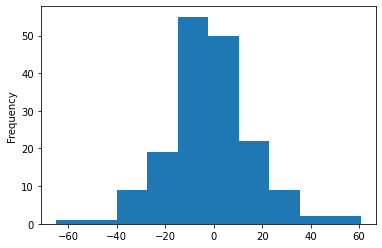

In [74]:
df_elo['Error'].plot(kind='hist')

In [75]:
np.sqrt((df_elo['Error']**2).sum()/df_elo.shape[0])

17.798988158700677

In [76]:
df_elo['Error'].loc[(df_elo['Error'] < 6) & (df_elo['Error'] > -6)].count() / df_elo.shape[0]

0.31176470588235294

In [77]:
df_elo['Error'].loc[(df_elo['Error'] < 12) & (df_elo['Error'] > -12)].count() / df_elo.shape[0]

0.5411764705882353

In [78]:
df_elo.to_csv('nrl_2023_elo.csv')

In [79]:
team_table['elo_2023'] = team_table.index.map(elo_dict)
team_table['elo_2023']

Brisbane Broncos          1609.597302
Canberra Raiders          1498.753913
Canterbury Bulldogs       1367.516861
Cronulla Sharks           1533.270413
Gold Coast Titans         1431.011112
Manly Sea Eagles          1467.216739
Melbourne Storm           1564.365657
New Zealand Warriors      1569.592739
Newcastle Knights         1518.746448
North QLD Cowboys         1533.709504
Parramatta Eels           1530.167792
Penrith Panthers          1691.512762
Redcliffe Dolphins        1442.649191
South Sydney Rabbitohs    1511.868893
St George Dragons         1402.943817
Sydney Roosters           1492.897380
Wests Tigers              1334.179476
Name: elo_2023, dtype: float64

In [80]:
team_table.to_csv('nrl_2023_team_summary.csv')

### Future Projections

In [81]:
df_proj = pd.read_csv('nrl_scores_2023_clean.csv')
df_proj = df_proj[df_proj['Home Score'].isnull()]
df_proj['Date'] = pd.to_datetime(df_proj['Date'], format='%Y/%m/%d')
#df_proj = df_proj[df_proj['Date'] <= (datetime.datetime.now() + datetime.timedelta(days=7))]
df_proj = df_proj.drop(['Home Score', 'Away Score'], axis=1)
df_proj = df_proj.reset_index(drop=True)

In [82]:
df_proj

,Date,Home Team,Away Team,Venue
0,2023-08-06,Parramatta Eels,St George Dragons,CommBank Stadium
1,2023-08-06,Canberra Raiders,Wests Tigers,GIO Stadium
2,2023-08-10,Manly Sea Eagles,Penrith Panthers,4 Pines Park
3,2023-08-11,Cronulla Sharks,Gold Coast Titans,PointsBet Stadium
4,2023-08-11,Brisbane Broncos,Parramatta Eels,The Gabba
5,2023-08-12,South Sydney Rabbitohs,St George Dragons,"Barlow Park, Cairns"
6,2023-08-12,Wests Tigers,New Zealand Warriors,"FMG Stadium Waikato, Hamilton"
7,2023-08-12,Sydney Roosters,Redcliffe Dolphins,Allianz Stadium
8,2023-08-13,Melbourne Storm,Canberra Raiders,AAMI Park
9,2023-08-13,Newcastle Knights,Canterbury Bulldogs,McDonald Jones Stadium


In [83]:
team_table = pd.read_csv('nrl_2023_team_summary.csv', index_col=0)

In [84]:
elo_dict = dict(zip(team_table.index,team_table['elo_2023']))
df_proj['home_elo'] = df_proj['Home Team'].map(elo_dict)
df_proj['away_elo'] = df_proj['Away Team'].map(elo_dict)

In [85]:
df_proj['elo_margin'] = ((df_proj['home_elo']+37.5) - df_proj['away_elo'])/15
    
df_proj['elo_home_chance'] = 1/(np.power(10,(-(df_proj['home_elo']-df_proj['away_elo']+37.5)/300))+1)
    
df_proj['elo_away_chance'] = 1.0 - df_proj['elo_home_chance']

df_proj = df_proj.drop(['home_elo','away_elo'], axis=1)

In [86]:
df_proj['dvoa_home'] = df_proj.apply(lambda row : ((team_table.loc[row['Home Team'],'average_for']+
                            team_table.loc[row['Home Team'],'dvoa_off']+
                            team_table.loc[row['Away Team'],'average_against']+
                            team_table.loc[row['Away Team'],'dvoa_def'])/2), axis=1)

df_proj['dvoa_away'] = df_proj.apply(lambda row : ((team_table.loc[row['Away Team'],'average_for']+
                            team_table.loc[row['Away Team'],'dvoa_off']+
                            team_table.loc[row['Home Team'],'average_against']+
                            team_table.loc[row['Home Team'],'dvoa_def'])/2), axis=1)

In [87]:
df_proj['dvhaa_home'] = df_proj.apply(lambda row : ((team_table.loc[row['Home Team'],'home_score']+
                            team_table.loc[row['Home Team'],'dvoa_home_off']+
                            team_table.loc[row['Away Team'],'away_score_ag']+
                            team_table.loc[row['Away Team'],'dvoa_away_def'])/2), axis=1)

df_proj['dvhaa_away'] = df_proj.apply(lambda row : ((team_table.loc[row['Away Team'],'away_score']+
                            team_table.loc[row['Away Team'],'dvoa_away_off']+
                            team_table.loc[row['Home Team'],'home_score_ag']+
                            team_table.loc[row['Home Team'],'dvoa_home_def'])/2), axis=1)

In [88]:
df_proj['dvoa_margin'] = df_proj['dvoa_home'] - df_proj['dvoa_away']
df_proj['dvhaa_margin'] = df_proj['dvhaa_home'] - df_proj['dvhaa_away']
df_proj['average_projections'] = (df_proj['dvoa_margin']+df_proj['dvhaa_margin']+df_proj['elo_margin'])/3

In [89]:
df_proj['home_win%'] = norm.cdf(df_proj['average_projections']/12)
df_proj['away_win%'] = 1.0 - df_proj['home_win%']

In [90]:
home_win, away_win = df_proj['home_win%'], df_proj['away_win%']

In [91]:
df_proj.to_csv('nrl_2023_projections.csv')

In [92]:
run_home = df_proj[df_proj['Home Team']=='South Sydney Rabbitohs'][['Date','Home Team','Away Team','average_projections','home_win%','away_win%']]
run_away = df_proj[df_proj['Away Team']=='South Sydney Rabbitohs'][['Date','Home Team','Away Team','average_projections','home_win%','away_win%']]
team_run = pd.concat([run_home, run_away])
team_run[['average_projections','home_win%','away_win%']] = team_run[['average_projections','home_win%','away_win%']].apply(lambda x: round(x,2))
team_run.sort_values(by=['Date'])

,Date,Home Team,Away Team,average_projections,home_win%,away_win%
5,2023-08-12,South Sydney Rabbitohs,St George Dragons,8.36,0.76,0.24
16,2023-08-20,Newcastle Knights,South Sydney Rabbitohs,-2.05,0.43,0.57
28,2023-09-01,South Sydney Rabbitohs,Sydney Roosters,3.16,0.60,0.40


In [93]:
df_proj

,Date,Home Team,Away Team,Venue,elo_margin,elo_home_chance,elo_away_chance,dvoa_home,dvoa_away,dvhaa_home,dvhaa_away,dvoa_margin,dvhaa_margin,average_projections,home_win%,away_win%
0,2023-08-06,Parramatta Eels,St George Dragons,CommBank Stadium,10.981598,0.779766,0.220234,31.225,20.430,31.160167,15.309556,10.795,15.850611,12.542403,0.852035,0.147965
1,2023-08-06,Canberra Raiders,Wests Tigers,GIO Stadium,13.471629,0.825055,0.174945,24.825,18.380,25.782234,18.031111,6.445,7.751123,9.222584,0.778919,0.221081
2,2023-08-10,Manly Sea Eagles,Penrith Panthers,4 Pines Park,-12.453068,0.192521,0.807479,10.390,25.940,13.498500,24.061000,-15.550,-10.562500,-12.855189,0.142025,0.857975
3,2023-08-11,Cronulla Sharks,Gold Coast Titans,PointsBet Stadium,9.317287,0.745109,0.254891,29.170,22.215,29.684500,17.939000,6.955,11.745500,9.339262,0.781796,0.218204
4,2023-08-11,Brisbane Broncos,Parramatta Eels,The Gabba,7.795301,0.710429,0.289571,25.485,20.110,25.800500,22.225500,5.375,3.575000,5.581767,0.679087,0.320913
5,2023-08-12,South Sydney Rabbitohs,St George Dragons,"Barlow Park, Cairns",9.761672,0.754703,0.245297,30.560,18.765,24.656667,21.125556,11.795,3.531111,8.362594,0.757062,0.242938
6,2023-08-12,Wests Tigers,New Zealand Warriors,"FMG Stadium Waikato, Hamilton",-13.194218,0.179603,0.820397,11.315,27.825,15.612653,30.652500,-16.510,-15.039847,-14.914688,0.106954,0.893046
7,2023-08-12,Sydney Roosters,Redcliffe Dolphins,Allianz Stadium,5.849879,0.662285,0.337715,21.800,21.700,24.406011,22.073500,0.100,2.332511,2.760797,0.590980,0.409020
8,2023-08-13,Melbourne Storm,Canberra Raiders,AAMI Park,6.874116,0.688134,0.311866,26.650,18.185,26.622500,17.995000,8.465,8.627500,7.988872,0.747211,0.252789
9,2023-08-13,Newcastle Knights,Canterbury Bulldogs,McDonald Jones Stadium,12.581972,0.809776,0.190224,32.160,16.610,32.105000,17.958333,15.550,14.146667,14.092880,0.879884,0.120116


In [94]:
future_wins = dict(df_proj.groupby(['Home Team'])['home_win%'].sum() + df_proj.groupby(['Away Team'])['away_win%'].sum())
future_wins

{'Brisbane Broncos': 2.186015236156942,
 'Canberra Raiders': 2.1404507444821634,
 'Canterbury Bulldogs': 0.9655656586142815,
 'Cronulla Sharks': 2.284605245344229,
 'Gold Coast Titans': 1.2221680322985327,
 'Manly Sea Eagles': 2.005771375052926,
 'Melbourne Storm': 2.6575464776068904,
 'New Zealand Warriors': 3.3115114502999994,
 'Newcastle Knights': 2.6468482046187414,
 'North QLD Cowboys': 1.284768719889564,
 'Parramatta Eels': 2.041582725855422,
 'Penrith Panthers': 3.5337187785997752,
 'Redcliffe Dolphins': 1.665667220187022,
 'South Sydney Rabbitohs': 1.9287335478106309,
 'St George Dragons': 1.0227486598290412,
 'Sydney Roosters': 2.0915444791846287,
 'Wests Tigers': 1.0107534441692092}

In [95]:
team_table['Projected_wins'] = team_table.index.map(future_wins)
team_table['Projected_wins'] += team_table['wins']
team_table

,home_score,home_score_ag,home_count,away_score,away_score_ag,away_count,wins,points_for,points_against,average_for,average_against,dvoa_off,dvoa_def,dvoa_home_off,dvoa_home_def,dvoa_away_off,dvoa_away_def,elo_2022,elo_2023,Projected_wins
Brisbane Broncos,23.00,17.70,10,27.64,17.09,11,16.0,534.0,365.0,25.43,17.38,2.92,-5.22,-0.359000,-2.990000,6.348182,-6.461818,1485,1609.597302,18.186015
Canberra Raiders,19.22,29.22,9,22.90,21.70,10,11.0,402.0,480.0,21.16,25.26,-1.59,2.73,-4.147778,6.152222,0.044000,0.012000,1539,1498.753913,13.140451
Canterbury Bulldogs,18.00,32.82,11,17.33,28.22,9,7.0,354.0,615.0,17.70,30.75,-4.10,7.02,-5.024545,8.272381,-2.322222,4.955556,1426,1367.516861,7.965566
Cronulla Sharks,29.40,19.50,10,22.70,24.60,10,11.0,521.0,441.0,26.05,22.05,3.25,0.02,6.059000,-2.514000,0.556000,2.808000,1550,1533.270413,13.284605
Gold Coast Titans,24.50,27.70,10,21.20,23.30,10,8.0,457.0,510.0,22.85,25.50,-0.49,3.54,0.734000,5.681000,-2.308000,0.610000,1424,1431.011112,9.222168
Manly Sea Eagles,22.90,20.70,10,18.60,24.30,10,9.5,415.0,450.0,20.75,22.50,-1.75,-0.18,-0.753000,-0.742000,-2.731000,0.908000,1447,1467.216739,11.505771
Melbourne Storm,27.00,17.80,10,20.20,21.30,10,12.0,472.0,391.0,23.60,19.55,1.71,-2.75,4.533000,-4.754000,-1.154000,-1.908000,1541,1564.365657,14.657546
New Zealand Warriors,18.70,16.60,10,29.80,19.80,10,13.0,485.0,364.0,24.25,18.20,1.32,-4.34,-3.220000,-5.826000,6.332000,-4.260000,1414,1569.592739,16.311511
Newcastle Knights,27.00,20.89,9,22.55,20.82,11,10.5,491.0,417.0,24.55,20.85,2.00,-1.23,4.034444,0.018889,0.832170,-2.072727,1409,1518.746448,13.146848
North QLD Cowboys,29.18,19.55,11,16.70,24.10,10,11.0,488.0,456.0,23.24,21.71,0.16,-1.44,5.375732,-3.036364,-5.722000,1.212021,1556,1533.709504,12.284769


In [96]:
team_table.head()

,home_score,home_score_ag,home_count,away_score,away_score_ag,away_count,wins,points_for,points_against,average_for,average_against,dvoa_off,dvoa_def,dvoa_home_off,dvoa_home_def,dvoa_away_off,dvoa_away_def,elo_2022,elo_2023,Projected_wins
Brisbane Broncos,23.00,17.70,10,27.64,17.09,11,16.0,534.0,365.0,25.43,17.38,2.92,-5.22,-0.359000,-2.990000,6.348182,-6.461818,1485,1609.597302,18.186015
Canberra Raiders,19.22,29.22,9,22.90,21.70,10,11.0,402.0,480.0,21.16,25.26,-1.59,2.73,-4.147778,6.152222,0.044000,0.012000,1539,1498.753913,13.140451
Canterbury Bulldogs,18.00,32.82,11,17.33,28.22,9,7.0,354.0,615.0,17.70,30.75,-4.10,7.02,-5.024545,8.272381,-2.322222,4.955556,1426,1367.516861,7.965566
Cronulla Sharks,29.40,19.50,10,22.70,24.60,10,11.0,521.0,441.0,26.05,22.05,3.25,0.02,6.059000,-2.514000,0.556000,2.808000,1550,1533.270413,13.284605
Gold Coast Titans,24.50,27.70,10,21.20,23.30,10,8.0,457.0,510.0,22.85,25.50,-0.49,3.54,0.734000,5.681000,-2.308000,0.610000,1424,1431.011112,9.222168


In [97]:
proj_win_df = team_table[['wins','points_for','points_against']]
proj_win_df.index

Index(['Brisbane Broncos', 'Canberra Raiders', 'Canterbury Bulldogs',
       'Cronulla Sharks', 'Gold Coast Titans', 'Manly Sea Eagles',
       'Melbourne Storm', 'New Zealand Warriors', 'Newcastle Knights',
       'North QLD Cowboys', 'Parramatta Eels', 'Penrith Panthers',
       'Redcliffe Dolphins', 'South Sydney Rabbitohs', 'St George Dragons',
       'Sydney Roosters', 'Wests Tigers'],
      dtype='object')

In [98]:
proj_win_df.index

Index(['Brisbane Broncos', 'Canberra Raiders', 'Canterbury Bulldogs',
       'Cronulla Sharks', 'Gold Coast Titans', 'Manly Sea Eagles',
       'Melbourne Storm', 'New Zealand Warriors', 'Newcastle Knights',
       'North QLD Cowboys', 'Parramatta Eels', 'Penrith Panthers',
       'Redcliffe Dolphins', 'South Sydney Rabbitohs', 'St George Dragons',
       'Sydney Roosters', 'Wests Tigers'],
      dtype='object')

In [99]:
playoff_win_pct = {name:0 for name in team_table.index}
top4_pct = {name:0 for name in team_table.index}
premierships = {name:0 for name in team_table.index}
runner_ups = {name:0 for name in team_table.index}
premierships

{'Brisbane Broncos': 0,
 'Canberra Raiders': 0,
 'Canterbury Bulldogs': 0,
 'Cronulla Sharks': 0,
 'Gold Coast Titans': 0,
 'Manly Sea Eagles': 0,
 'Melbourne Storm': 0,
 'New Zealand Warriors': 0,
 'Newcastle Knights': 0,
 'North QLD Cowboys': 0,
 'Parramatta Eels': 0,
 'Penrith Panthers': 0,
 'Redcliffe Dolphins': 0,
 'South Sydney Rabbitohs': 0,
 'St George Dragons': 0,
 'Sydney Roosters': 0,
 'Wests Tigers': 0}

In [100]:
store_finalists = list_finalists

NameError: name 'list_finalists' is not defined

In [101]:
final_fixtures = [[1,4],[2,3],[5,8],[6,7],[4,5],[3,6],[1,3],[2,4],[1,2]]
list_finalists = store_finalists

for fixture in final_fixtures:
    
    
    home_finalist = list_finalists[fixture[0]-1]
    away_finalist = list_finalists[fixture[1]-1]

    home_score = (team_table.loc[home_finalist,'home_score']+
                  team_table.loc[home_finalist,'dvoa_home_off']+
                  team_table.loc[away_finalist,'away_score_ag']+
                  team_table.loc[away_finalist,'dvoa_away_def'])/2

    away_score = (team_table.loc[away_finalist,'away_score']+
                  team_table.loc[away_finalist,'dvoa_away_off']+
                  team_table.loc[home_finalist,'home_score_ag']+
                  team_table.loc[home_finalist,'dvoa_home_def'])/2

    margin = home_score - away_score + np.random.normal(0,12)
    print(f'{home_finalist} vs {away_finalist} : {margin}')

    if margin > 0:
        list_finalists[fixture[0]-1] = home_finalist
        list_finalists[fixture[1]-1] = away_finalist
    else:
        list_finalists[fixture[0]-1] = away_finalist
        list_finalists[fixture[1]-1] = home_finalist




NameError: name 'store_finalists' is not defined

In [102]:
def sim_nrl_finals(list_finalists):
    final_fixtures = [[1,4],[2,3],[5,8],[6,7],[4,5],[3,6],[1,3],[2,4],[1,2]]

    for fixture in final_fixtures:
        
        home_finalist = list_finalists[fixture[0]-1]
        away_finalist = list_finalists[fixture[1]-1]

        home_score = (team_table.loc[home_finalist,'home_score']+
                      team_table.loc[home_finalist,'dvoa_home_off']+
                      team_table.loc[away_finalist,'away_score_ag']+
                      team_table.loc[away_finalist,'dvoa_away_def'])/2

        away_score = (team_table.loc[away_finalist,'away_score']+
                      team_table.loc[away_finalist,'dvoa_away_off']+
                      team_table.loc[home_finalist,'home_score_ag']+
                      team_table.loc[home_finalist,'dvoa_home_def'])/2

        margin = home_score - away_score + np.random.normal(0,12)

        if margin > 0:
            list_finalists[fixture[0]-1] = home_finalist
            list_finalists[fixture[1]-1] = away_finalist
        else:
            list_finalists[fixture[0]-1] = away_finalist
            list_finalists[fixture[1]-1] = home_finalist
    
    return list_finalists[0], list_finalists[1]


In [104]:
playoff_win_pct = {name:0 for name in team_table.index}
top4_pct = {name:0 for name in team_table.index}
premierships = {name:0 for name in team_table.index}
runner_ups = {name:0 for name in team_table.index}

results_list = []

for _ in range(10000):
    proj_win_df = team_table[['wins','points_for','points_against']]

    for j in range(len(df_proj)):
        margin = df_proj.loc[j,'average_projections'] + np.random.normal(0,12)
        if margin > 0:
            proj_win_df.loc[df_proj.loc[j,'Home Team'],'wins'] += 1
            
        else:
            proj_win_df.loc[df_proj.loc[j,'Away Team'],'wins'] += 1
        
        proj_win_df.loc[df_proj.loc[j,'Home Team'],'points_for'] += margin
        proj_win_df.loc[df_proj.loc[j,'Away Team'],'points_for'] -= margin
    
    proj_win_df['pts_diff'] = proj_win_df['points_for'] - proj_win_df['points_against']
    season_dict = {name:[proj_win_df.loc[name,'wins'],round(proj_win_df.loc[name,'pts_diff'],0)] for name in proj_win_df.index}
    results_list.append(season_dict)
    
    proj_win_df = proj_win_df.sort_values(['wins','pts_diff'], ascending=False)
    
    df_finalists = proj_win_df.iloc[0:8,0]
    list_finalists = list(df_finalists.index)
    
    premiers, runner_up = sim_nrl_finals(list_finalists)
    
    premierships[premiers] += 1
    runner_ups[runner_up] += 1
    
    for r in proj_win_df[:4].index:
        top4_pct[r] += 1
        playoff_win_pct[r] += 1
        
    for r in proj_win_df[4:8].index:
        playoff_win_pct[r] += 1

premierships

C:\Users\white\AppData\Local\Temp/ipykernel_12372/3627479930.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proj_win_df['pts_diff'] = proj_win_df['points_for'] - proj_win_df['points_against']


{'Brisbane Broncos': 1603,
 'Canberra Raiders': 38,
 'Canterbury Bulldogs': 0,
 'Cronulla Sharks': 182,
 'Gold Coast Titans': 0,
 'Manly Sea Eagles': 2,
 'Melbourne Storm': 675,
 'New Zealand Warriors': 1699,
 'Newcastle Knights': 191,
 'North QLD Cowboys': 5,
 'Parramatta Eels': 50,
 'Penrith Panthers': 4989,
 'Redcliffe Dolphins': 0,
 'South Sydney Rabbitohs': 564,
 'St George Dragons': 0,
 'Sydney Roosters': 2,
 'Wests Tigers': 0}

In [70]:
results_list

[{'Brisbane Broncos': [17.0, 138.0],
  'Canberra Raiders': [14.0, -77.0],
  'Canterbury Bulldogs': [7.0, -300.0],
  'Cronulla Sharks': [14.0, 148.0],
  'Gold Coast Titans': [9.0, -66.0],
  'Manly Sea Eagles': [12.5, 25.0],
  'Melbourne Storm': [16.0, 112.0],
  'New Zealand Warriors': [14.0, 146.0],
  'Newcastle Knights': [12.5, 91.0],
  'North QLD Cowboys': [15.0, 98.0],
  'Parramatta Eels': [14.0, 115.0],
  'Penrith Panthers': [16.0, 229.0],
  'Redcliffe Dolphins': [9.0, -133.0],
  'South Sydney Rabbitohs': [12.0, 72.0],
  'St George Dragons': [7.0, -185.0],
  'Sydney Roosters': [11.0, -97.0],
  'Wests Tigers': [4.0, -315.0]},
 {'Brisbane Broncos': [17.0, 162.0],
  'Canberra Raiders': [15.0, -29.0],
  'Canterbury Bulldogs': [8.0, -285.0],
  'Cronulla Sharks': [14.0, 128.0],
  'Gold Coast Titans': [9.0, -108.0],
  'Manly Sea Eagles': [11.5, -21.0],
  'Melbourne Storm': [15.0, 82.0],
  'New Zealand Warriors': [14.0, 116.0],
  'Newcastle Knights': [13.5, 105.0],
  'North QLD Cowboys': [1

In [72]:
df_season_mc = pd.DataFrame.from_records(results_list)
df_season_mc.head()

,Brisbane Broncos,Canberra Raiders,Canterbury Bulldogs,Cronulla Sharks,Gold Coast Titans,Manly Sea Eagles,Melbourne Storm,New Zealand Warriors,Newcastle Knights,North QLD Cowboys,Parramatta Eels,Penrith Panthers,Redcliffe Dolphins,South Sydney Rabbitohs,St George Dragons,Sydney Roosters,Wests Tigers
0,"[17.0, 138.0]","[14.0, -77.0]","[7.0, -300.0]","[14.0, 148.0]","[9.0, -66.0]","[12.5, 25.0]","[16.0, 112.0]","[14.0, 146.0]","[12.5, 91.0]","[15.0, 98.0]","[14.0, 115.0]","[16.0, 229.0]","[9.0, -133.0]","[12.0, 72.0]","[7.0, -185.0]","[11.0, -97.0]","[4.0, -315.0]"
1,"[17.0, 162.0]","[15.0, -29.0]","[8.0, -285.0]","[14.0, 128.0]","[9.0, -108.0]","[11.5, -21.0]","[15.0, 82.0]","[14.0, 116.0]","[13.5, 105.0]","[13.0, 32.0]","[15.0, 130.0]","[16.0, 251.0]","[9.0, -123.0]","[12.0, 88.0]","[5.0, -159.0]","[11.0, -91.0]","[6.0, -277.0]"
2,"[16.0, 135.0]","[15.0, -51.0]","[7.0, -322.0]","[13.0, 106.0]","[10.0, -49.0]","[9.5, -76.0]","[14.0, 66.0]","[17.0, 192.0]","[9.5, 1.0]","[14.0, 55.0]","[13.0, 105.0]","[19.0, 292.0]","[10.0, -79.0]","[14.0, 150.0]","[7.0, -116.0]","[11.0, -128.0]","[5.0, -281.0]"
3,"[17.0, 160.0]","[14.0, -65.0]","[8.0, -297.0]","[13.0, 74.0]","[9.0, -23.0]","[8.5, -69.0]","[14.0, 27.0]","[17.0, 168.0]","[10.5, 32.0]","[14.0, 78.0]","[14.0, 125.0]","[19.0, 307.0]","[11.0, -47.0]","[14.0, 102.0]","[7.0, -123.0]","[10.0, -165.0]","[4.0, -284.0]"
4,"[15.0, 79.0]","[14.0, -50.0]","[7.0, -298.0]","[15.0, 149.0]","[13.0, 43.0]","[9.5, -59.0]","[17.0, 116.0]","[15.0, 158.0]","[11.5, 59.0]","[12.0, 42.0]","[15.0, 146.0]","[16.0, 235.0]","[12.0, -106.0]","[13.0, 126.0]","[5.0, -207.0]","[10.0, -140.0]","[4.0, -292.0]"


In [80]:
df_season_mc['Brisbane Broncos'][4][0]

15.0

In [86]:
for t in playoff_win_pct:
    print(f'{t}: \t\t{playoff_win_pct[t]/100}% \t\t{round(1.0/((playoff_win_pct[t]/10000)+0.000001),2)}')
    

Brisbane Broncos: 		99.89% 		1.0
Canberra Raiders: 		83.03% 		1.2
Canterbury Bulldogs: 		0.0% 		1000000.0
Cronulla Sharks: 		86.34% 		1.16
Gold Coast Titans: 		0.32% 		312.4
Manly Sea Eagles: 		2.65% 		37.73
Melbourne Storm: 		95.74% 		1.04
New Zealand Warriors: 		99.65% 		1.0
Newcastle Knights: 		13.11% 		7.63
North QLD Cowboys: 		53.84% 		1.86
Parramatta Eels: 		74.18% 		1.35
Penrith Panthers: 		100.0% 		1.0
Redcliffe Dolphins: 		3.1% 		32.26
South Sydney Rabbitohs: 		87.46% 		1.14
St George Dragons: 		0.0% 		1000000.0
Sydney Roosters: 		0.69% 		144.91
Wests Tigers: 		0.0% 		1000000.0


In [87]:
for t in playoff_win_pct:
    print(f'{t}: {top4_pct[t]/100}%')

Brisbane Broncos: 92.14%
Canberra Raiders: 18.69%
Canterbury Bulldogs: 0.0%
Cronulla Sharks: 23.05%
Gold Coast Titans: 0.0%
Manly Sea Eagles: 0.03%
Melbourne Storm: 49.43%
New Zealand Warriors: 83.93%
Newcastle Knights: 0.28%
North QLD Cowboys: 3.39%
Parramatta Eels: 9.73%
Penrith Panthers: 99.61%
Redcliffe Dolphins: 0.0%
South Sydney Rabbitohs: 19.72%
St George Dragons: 0.0%
Sydney Roosters: 0.0%
Wests Tigers: 0.0%


### Exploring the Monte-Carlo Simulations

In [2]:
nrl_projections = pd.read_csv('nrl_2023_mc.csv', index_col=0)
nrl_projections.shape[0]

10000

In [3]:
mc_dict = {}
for team in nrl_projections.columns:
    results = []
    for i in range(nrl_projections.shape[0]):
        result_string = nrl_projections.loc[i, team]
        result_string = result_string.strip('[]').split(',')
        clean_result = float(result_string[0]) + round(float(result_string[1])/10000,5)
        results.append(clean_result)
    
    mc_dict[team] = results
df_sim_mc = pd.DataFrame.from_records(mc_dict)

In [4]:
year_results_list = []
for i in range(df_sim_mc.shape[0]):
    year_series = df_sim_mc.loc[i,:].rank(ascending=False)
    year_results_list.append(year_series.values)


In [5]:
columns = df_sim_mc.columns
year_mc_positions = pd.DataFrame(year_results_list, columns = columns)

In [6]:

for team in year_mc_positions.columns:
    top4_pct = len(year_mc_positions[year_mc_positions[team] < 4.5])
    top8_pct = len(year_mc_positions[year_mc_positions[team] < 8.5])
    most_common = year_mc_positions[team].mode()[0]
    average_position = year_mc_positions[team].mean()

    print(f'Team: \t{team}')
    print(f'Top 4:\t{top4_pct/10000:.2%}\nTop 8:\t{top8_pct/10000:.2%}')
    print(f'Most Occuring:\t{most_common}\nAverage Posisition:\t{average_position}\n\n')


Team: 	Brisbane Broncos
Top 4:	100.00%
Top 8:	100.00%
Most Occuring:	2.0
Average Posisition:	1.89105


Team: 	Canberra Raiders
Top 4:	5.66%
Top 8:	66.47%
Most Occuring:	8.0
Average Posisition:	7.6232


Team: 	Canterbury Bulldogs
Top 4:	0.00%
Top 8:	0.00%
Most Occuring:	15.0
Average Posisition:	14.9659


Team: 	Cronulla Sharks
Top 4:	13.59%
Top 8:	84.91%
Most Occuring:	5.0
Average Posisition:	6.41635


Team: 	Gold Coast Titans
Top 4:	0.00%
Top 8:	0.00%
Most Occuring:	13.0
Average Posisition:	13.46965


Team: 	Manly Sea Eagles
Top 4:	0.02%
Top 8:	9.85%
Most Occuring:	11.0
Average Posisition:	10.6163


Team: 	Melbourne Storm
Top 4:	66.74%
Top 8:	98.98%
Most Occuring:	4.0
Average Posisition:	4.536


Team: 	New Zealand Warriors
Top 4:	99.42%
Top 8:	100.00%
Most Occuring:	3.0
Average Posisition:	2.98295


Team: 	Newcastle Knights
Top 4:	6.67%
Top 8:	79.15%
Most Occuring:	5.0
Average Posisition:	6.8569


Team: 	North QLD Cowboys
Top 4:	0.17%
Top 8:	36.83%
Most Occuring:	10.0
Average Posisitio

In [7]:
year_mc_positions.to_csv('nrl_2023_mc_positions.csv')